In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### loading images and labels

In [2]:
"""Labels and images collector"""
import os
mypath = '/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_test/'
 
#mypath = '/Users/jenifervivar/Desktop/crop_part1/'#'./Data/CroppedImages'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

path = '/Users/jenifervivar/Desktop/UTKface_inthewild/part3'
listing = os.listdir(mypath) 
images = []
for img in filedfnona['file']:
    image = plt.imread(mypath + img)
    images.append(image)

In [3]:
images[0].shape

(200, 200, 3)

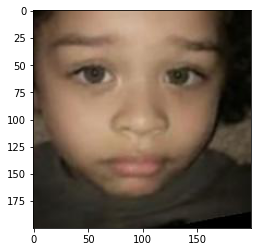

In [4]:
plt.imshow(images[0])

#### This cell detected the faces on the images using Haar Cascade. Once the faces are detected the everything ouside the face is black out. The problem is that some faces in the images are not recognized

[ 11   4 181 181]
1 177 176


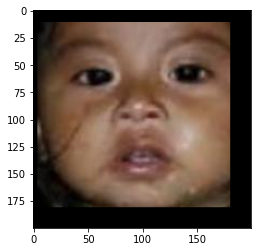

In [6]:
import numpy as np
import cv2


f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')#cv2.data.haarcascades +
#e_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
rectangles = []
masked = []
phonyimg =[]
i = 0
for image in images:
    
#gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray = cv2.equalizeHist(gray)
#faces = face_cascade.detectMultiScale(gray)
    faces = f_cascade.detectMultiScale(gray, minNeighbors = 1, minSize =[9,9]) #, 1.3, 5, scalefactor=#1.2
    if type(faces)!= tuple:
        i+=1
        testImg = image
        param = faces[0]
        print(param)
        testImg[0:param[0]] = 0
        testImg[param[2]:200] = 0
        testImg[:, 0:param[1]]  = 0
        testImg[:, param[3]:200] = 0
        masked.append(testImg)
        break
    else:
        phonyimg.append(image)
      

    
    
    
print(i, len(images), len(images) - i) 

#print(masked[0])
plt.imshow(masked[0])
plt.show()
#108 177 69
#90 177 87

In [ ]:
plt.imshow(masked[4])
plt.show()

### the below code is the same as the one above except in this one i'm drawing the rectangle over the image

()


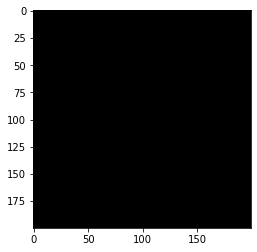

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#Read in the cascade classifiers for face and eyes
#face_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_eye.xml')
 
 
 
# create a function to detect face
def adjusted_detect_face(img):
     
    face_img = img.copy()
     
    face_rect = face_cascade.detectMultiScale(face_img,
                                              scaleFactor = 1.1,#1.2
                                              minNeighbors = 1) #5
     
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y),
                      (x + w, y + h), (200, 200, 200), 10)\
         
    return face_img, face_rect
 
 

# Reading in the image and creating copies
img = images[0]
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()
 
# Detecting the face
face, magnitude = adjusted_detect_face(img_copy1)
plt.imshow(face)
print(magnitude)
# Saving the image
#cv2.imwrite('face.jpg', face)

()


IndexError: tuple index out of range

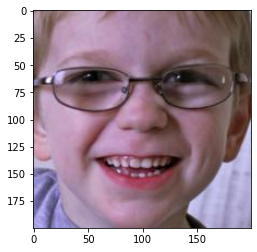

In [11]:

testImg = images[30]
plt.imshow(testImg)
param = magnitude
print(param)
testImg[0:param[0]] = 0
testImg[param[2]:200] = 0
testImg[:,0:param[1]]  = 0
testImg[:,param[3]:200] = 0
plt.imshow(testImg)

In [ ]:
import numpy as np
import cv2
f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
e_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
image = cv2.imread((mypath + img))
#gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
#faces = face_cascade.detectMultiScale(gray)
faces = f_cascade.detectMultiScale(gray) #, 1.3, 5
print(faces)

In [ ]:
#testImg = images[0]
#plt.imshow(testImg)
param = magnitude[1]
testImg[0:param[0]] = 0
testImg[param[2]:200] = 0
test
testImg[:,param[3]:200] = 0
plt.imshow(testImg)

In [ ]:
f_cascade.detectMultiScale?